# Part II - Loan Default Risk Analysis by Income and Borrower Rate  
by Jana Alruzuq

## Investigation Overview

This presentation summarizes key findings from our data exploration of loan records. The goal of this analysis was to understand how different factors such as income range, loan amount, and loan status affect the borrower rate.

Key insights include:

- Borrowers with lower income levels tend to receive loans with higher interest rates (borrower rate).
- Loan status varies significantly across income groups. For instance, "Charged-off" and "Defaulted" loans are more frequent in the lower-income brackets.
- Borrowers with higher income are more likely to be current on their loans or have completed them, and they tend to receive lower interest rates.
- Although some high loan amounts are charged off, the borrower’s income level seems to be a more reliable indicator of risk than loan size alone.
- Employment status also appears to influence borrower rate and loan status.

These insights help in identifying risk profiles and could be useful in making lending decisions or offering personalized interest rates in the future.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Load the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')  # replace with the correct file name
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


##  Visualization 1: How Prosper Rating Affects Borrower APR ?

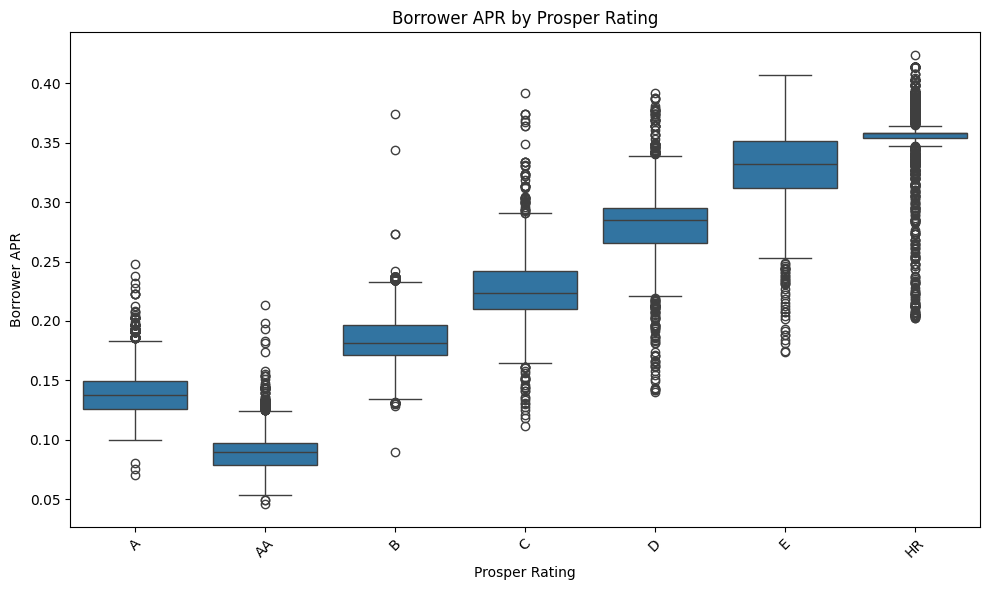

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_viz1 = loan_df[['ProsperRating (Alpha)', 'BorrowerAPR']].dropna()

order = sorted(df_viz1['ProsperRating (Alpha)'].unique())


plt.figure(figsize=(10, 6))
sns.boxplot(data=df_viz1, x='ProsperRating (Alpha)', y='BorrowerAPR', order=order)
plt.title('Borrower APR by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This boxplot shows the relationship between Prosper Rating (Alpha) and Borrower APR (Annual Percentage Rate). The chart reveals a clear inverse correlation: borrowers with lower credit ratings (e.g., HR, E) tend to have significantly higher APRs, while those with better ratings (e.g., AA, A) benefit from lower interest rates. This suggests that Prosper adjusts the interest rate based on the perceived risk of the borrower.

# Visualization 2 : How does loan status vary with income range?

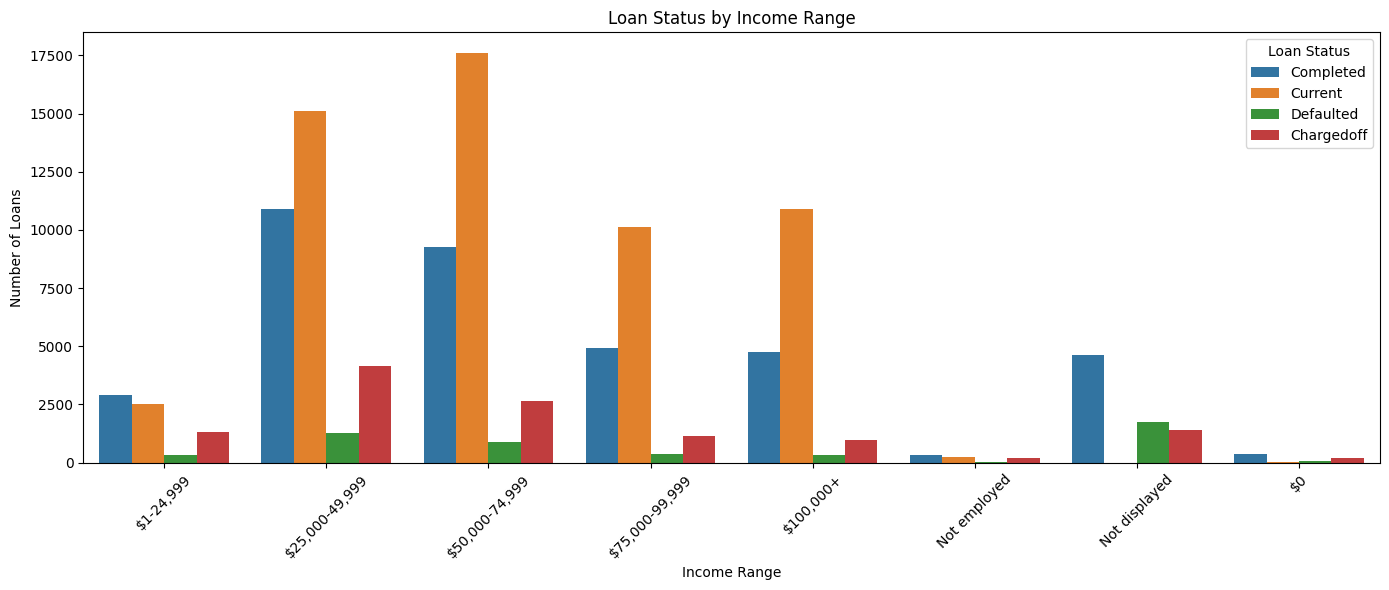

In [ ]:

income_order = [
    '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999',
    '$100,000+', 'Not employed', 'Not displayed', '$0'
]
income_dtype = CategoricalDtype(categories=income_order, ordered=True)

status_order = ['Completed', 'Current', 'Defaulted', 'Chargedoff']
status_dtype = CategoricalDtype(categories=status_order, ordered=True)

df = loan_df[loan_df['LoanStatus'].isin(status_order)].copy()
df['IncomeRange'] = df['IncomeRange'].astype(income_dtype)
df['LoanStatus'] = df['LoanStatus'].astype(status_dtype)


plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='IncomeRange', hue='LoanStatus')
plt.xticks(rotation=45)
plt.title('Loan Status by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Number of Loans')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()


This bar chart illustrates the distribution of loan statuses across different income ranges. It is evident that borrowers with higher income ranges tend to have more loans in the "Current" and "Completed" statuses, indicating stronger repayment performance. On the other hand, lower income brackets, such as "$0" or "Not employed", show relatively higher proportions of "Chargedoff" and "Defaulted" loans, suggesting increased credit risk among low-income individuals.

## (Visualization 3) :
How does the Employment Status of a borrower affect their Borrower APR? Do unemployed or part-time workers tend to receive higher APR rates compared to full-time employees?

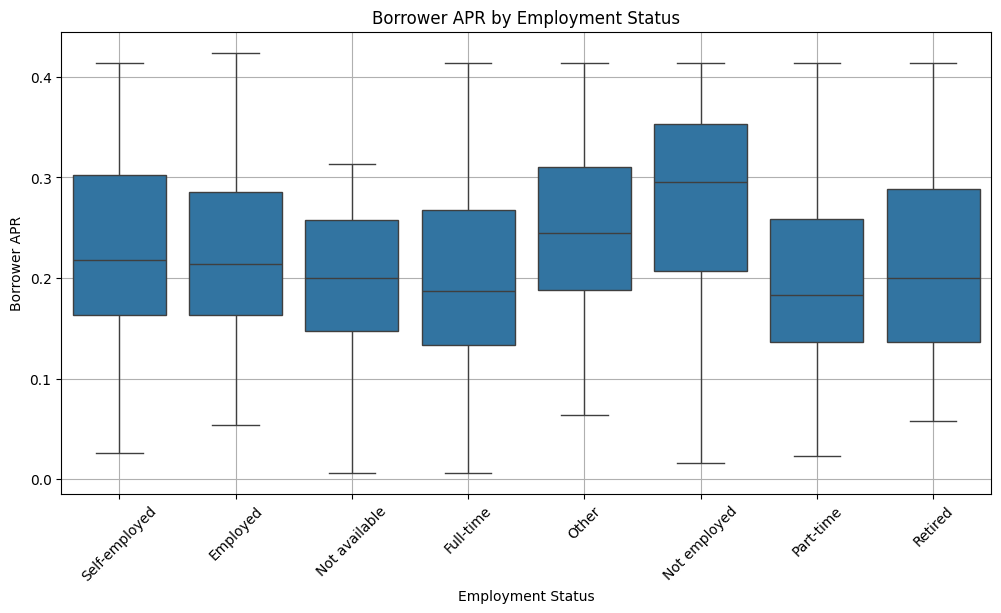

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=loan_df, x='EmploymentStatus', y='BorrowerAPR')
plt.xticks(rotation=45)
plt.title('Borrower APR by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR')
plt.grid(True)
plt.show()

The box plot shows the variation in Borrower APR across different employment statuses. Borrowers who are not employed tend to have higher APR rates on average compared to those who are employed full-time, indicating that employment status plays a significant role in loan pricing. Additionally, self-employed and other categories also show relatively higher APRs, while full-time workers consistently receive lower rates, likely due to greater financial stability and lower credit risk.


---

###  **Conclusion (Wrapping Up the Analysis):**

> This analysis aimed to uncover how different borrower characteristics affect loan pricing and loan status. Through the visualizations, we observed that:
>
> * Higher Prosper Ratings are associated with lower APRs.
> * Income range influences loan outcomes, with mid-range incomes showing higher loan counts.
> * Employment status significantly impacts the interest rate offered, with unemployed borrowers receiving the highest rates.
>
> These insights highlight how lenders use borrower information to assess risk and set loan conditions. Understanding these patterns can help borrowers improve their profiles and make more informed financial decisions.

